<a href="https://colab.research.google.com/github/purosh96/NeuralNetwork/blob/main/MNIST_MultiLayer_TF1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True);

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

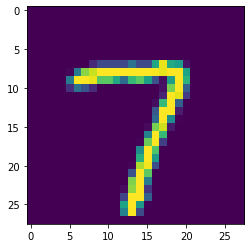

In [5]:
plt.imshow(mnist.train.images[100].reshape(28,28))

In [6]:
mnist.train.labels[100].argmax()

7

In [7]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [8]:
w1 = tf.Variable(tf.truncated_normal([784,200],stddev = 0.5))
b1 = tf.Variable(tf.truncated_normal([200],stddev = 0.5))

I1 = tf.add(tf.matmul(x,w1),b1)
O1 = tf.nn.relu(I1)

In [9]:
w2 = tf.Variable(tf.truncated_normal([200,100],stddev = 0.5))
b2 = tf.Variable(tf.truncated_normal([100],stddev = 0.5))

I2 = tf.add(tf.matmul(O1,w2),b2)
O2 = tf.nn.relu(I2)

In [10]:
w3 = tf.Variable(tf.truncated_normal([100,60],stddev = 0.5))
b3 = tf.Variable(tf.truncated_normal([60],stddev = 0.5))

I3 = tf.add(tf.matmul(O2,w3),b3)
O3 = tf.nn.relu(I3)

In [11]:
w4 = tf.Variable(tf.truncated_normal([60,30],stddev = 0.5))
b4 = tf.Variable(tf.truncated_normal([30],stddev = 0.5))

I4 = tf.add(tf.matmul(O3,w4),b4)
O4 = tf.nn.relu(I4)

In [12]:
w5 = tf.Variable(tf.truncated_normal([30,10],stddev = 0.5))
b5 = tf.Variable(tf.truncated_normal([10],stddev = 0.5))

I5 = tf.add(tf.matmul(O4,w5),b5)
O5 = tf.nn.softmax(I5)

In [13]:
individual_loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits= O5)
loss = tf.reduce_mean(individual_loss)

In [14]:
gdo = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = gdo.minimize(loss)

In [15]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
sess.run(b5)

array([-0.34234536, -0.20903184,  0.13376863,  0.27099615,  0.21997318,
        0.08266823, -0.13210402, -0.05284017,  0.06790935,  0.67175174],
      dtype=float32)

In [17]:
for i in range(10000):
  x_train,y_train = mnist.train.next_batch(1000)
  sess.run(train,feed_dict={x:x_train,y:y_train})


In [18]:
y_pred = sess.run(O5,feed_dict={x:mnist.test.images})

In [19]:
y_pred = sess.run(tf.argmax(y_pred,1))

In [20]:
y_pred

array([3, 2, 1, ..., 9, 5, 2])

In [21]:
labels = mnist.test.labels
labels = sess.run(tf.argmax(labels,1))
labels

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(labels,y_pred)

0.6713